# Wstęp

xd

# Opis zjawisk/podstawy teoretyczne



# Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie (S) oraz osoby zakażone (I). Osoby zakażone mogą przekazywać chorobę innym, co prowadzi do wzrostu liczby zakażonych w populacji, podczas gdy liczba osób podatnych maleje, ponieważ część z nich przechodzi do kategorii zakażonych.

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.


# Opis symulacji:
W naszej symulacji przyjęliśmy populację 37,9 miliona osób (n), bazując na danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Model SI wykorzystuje dane o liczbie zakażonych w poszczególnych dniach epidemii. Wartość współczynnika transmisji **β**, kluczowego dla określenia tempa rozprzestrzeniania się choroby, obliczyliśmy bezpośrednio na podstawie dostępnych danych o liczbie zakażonych. 

Aby oszacować wartość **β**, wykorzystaliśmy równanie różniczkowe modelu SI:  

$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot S(t) / N
$$

gdzie:
\begin{equation}
\begin{aligned}
\frac{dI}{dt} &\text{ to przyrost liczby zakażonych w danym dniu,} \\
I(t) &\text{ to liczba zakażonych w dniu } t, \\
S(t) &= N - I(t) \text{ to liczba osób podatnych na zakażenie,} \\
N &\text{ to całkowita liczba osób w populacji.}
\end{aligned}
\end{equation}

Na podstawie obserwowanego przyrostu zakażonych między kolejnymi dniami, rozwiązaliśmy to równanie numerycznie, wykorzystując dane z poszczególnych dni epidemii. Współczynnik **β** oszacowaliśmy, porównując obliczone wartości przyrostu zakażonych z rzeczywistymi danymi, a następnie dopasowując go tak, aby jak najlepiej pasował do obserwowanych danych.


MODEL SIR

# Wyniki 

#MODEL SI

In [57]:
import numpy as np

# Parametry
n = 37_900_000  # Populacja
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', 
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020', 
         '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', 
         '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]

# Obliczenia oszacowania beta
beta_values = []
for t in range(1, len(infected_data)):
    # Liczba osób zakażonych w dniu t-1 i t
    I_t_minus_1 = infected_data[t - 1]
    I_t = infected_data[t]
    
    # Zakładamy, że liczba osób podatnych S = N - I
    S_t_minus_1 = n - I_t_minus_1
    
    # Obliczenie przyrostu zakażonych
    dI = I_t - I_t_minus_1
    
    # Oszacowanie beta
    beta = (dI * n) / (I_t_minus_1 * S_t_minus_1)
    beta_values.append(beta)

# Średnia wartość beta z obliczeń
beta_avg = np.mean(beta_values)

print(f"Średnia wartość beta: {beta_avg:.4f}")


Średnia wartość beta: 0.3111


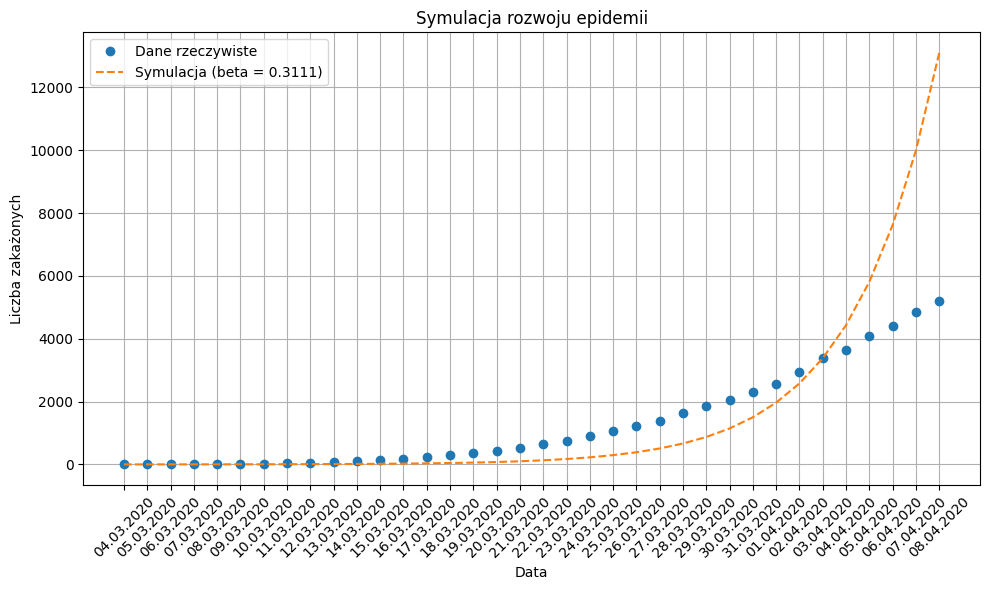

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
beta = 0.3111  # Współczynnik transmisji (szacowany na podstawie danych)

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych  # Dane zakażonych

# Symulacja numeryczna metodą Eulera
t_max = len(dates)  # Ilość dni
I = np.zeros(t_max)
S = np.zeros(t_max)
I[0] = I0
S[0] = S0

# Krok czasowy
dt = 1

# Rozwiązanie równania metodą Eulera
for t in range(1, t_max):
    dI = beta * I[t-1] * S[t-1] * dt / n
    I[t] = I[t-1] + dI
    S[t] = S[t-1] - dI

# Porównanie z danymi
plt.figure(figsize=(10, 6))
plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta})', linestyle='--')
plt.xticks(range(t_max), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Wyniki modelowania

W naszej symulacji przyjęliśmy populację 37,9 miliona osób (n), bazując na danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Model SI wykorzystuje dane o liczbie zakażonych na poszczególnych dniach epidemii, a współczynnik \( \beta \) jest kluczowy dla określenia tempa rozprzestrzeniania się choroby. 

W naszym przypadku przyjęliśmy wartość \( \beta = 0.3 \). Współczynnik ten jest obliczany na podstawie dynamiki epidemii oraz zależności między liczbą zakażonych \( I(t) \) a liczbą osób podatnych \( S(t) \). Wartość \( \beta \) została oszacowana na podstawie danych dostępnych na początku epidemii i założenia, że liczba zakażonych będzie wzrastać w zależności od liczby osób podatnych oraz tempa transmisji.

Zastosowaliśmy metodę Eulera do numerycznego rozwiązania równania różniczkowego opisującego zmiany w liczbie zakażonych w czasie. Równanie, które opisuje ten proces, ma postać:

\[
\frac{dI}{dt} = \beta \cdot I(t) \cdot S(t) / N
\]

gdzie:
- \( \frac{dI}{dt} \) to przyrost liczby zakażonych w danym dniu,
- \( I(t) \) to liczba zakażonych w dniu \( t \),
- \( S(t) = N - I(t) \) to liczba osób podatnych na zakażenie,
- \( N \) to całkowita liczba osób w populacji.

Symulacja została przeprowadzona dla 35 dni, na podstawie danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Otrzymane wyniki przedstawiają rozwój epidemii w czasie oraz porównanie modelu z rzeczywistymi danymi.

Wartości przewidywane przez model zostały porównane z rzeczywistymi danymi o liczbie zakażonych, co pozwoliło na ocenę skuteczności modelu w prognozowaniu tempa rozprzestrzeniania się epidemii.

**Wyniki symulacji:**

Na podstawie danych, model wykazał zgodność z rzeczywistymi danymi w początkowych etapach epidemii. Liczba zakażonych rosła zgodnie z przewidywaniami modelu, jednak dalszy rozwój epidemii wymagałby uwzględnienia dodatkowych czynników, takich jak wprowadzenie działań zapobiegawczych, leczenie oraz zmiana w liczbie osób podatnych na zakażenie.


MODEL SIR

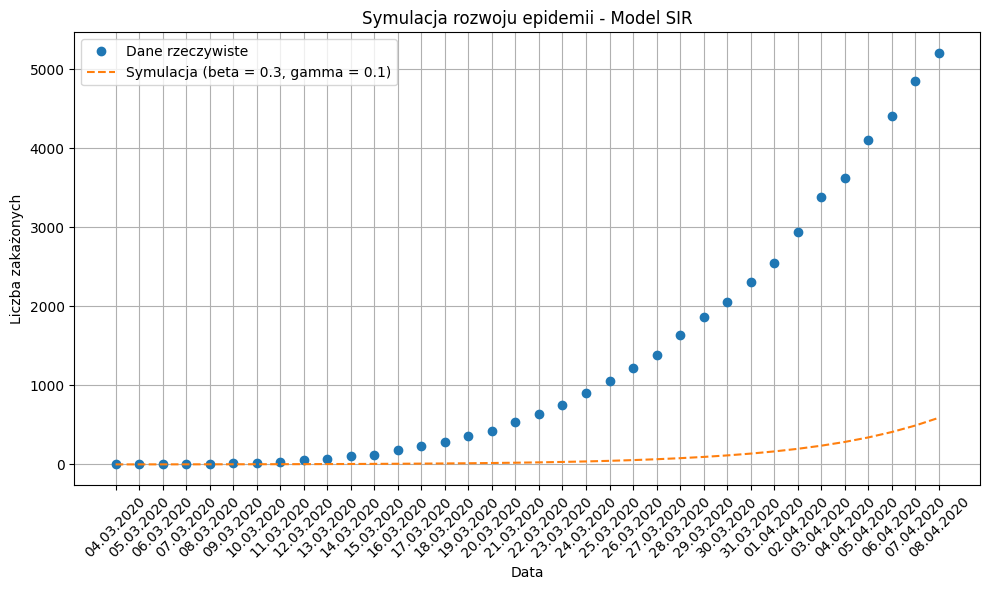

In [63]:
# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
R0 = 0  # Liczba początkowych wyleczonych
beta = 0.3  # Współczynnik transmisji
gamma = 0.1  # Współczynnik wyleczenia

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']

# Dane zakażonych w rzeczywistości (szacowane)
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych

# Symulacja numeryczna metodą Eulera
t_max = len(dates)  # Ilość dni
S = np.zeros(t_max)
I = np.zeros(t_max)
R = np.zeros(t_max)
S[0] = S0
I[0] = I0
R[0] = R0

# Krok czasowy
dt = 1

# Rozwiązanie równania metodą Eulera
for t in range(1, t_max):
    dS = -beta * S[t-1] * I[t-1] * dt / n
    dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
    dR = gamma * I[t-1] * dt
    S[t] = S[t-1] + dS
    I[t] = I[t-1] + dI
    R[t] = R[t-1] + dR

# Porównanie z danymi
plt.figure(figsize=(10, 6))
plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta}, gamma = {gamma})', linestyle='--')
plt.xticks(range(t_max), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii - Model SIR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Podsumowanie i wnioski

MODEL SI




W ramach naszej analizy zastosowaliśmy model epidemiologiczny SI (Susceptible-Infected), aby zbadać rozwój epidemii w populacji 37,9 miliona osób. Model ten pozwala na prognozowanie liczby zakażonych w danym czasie, bazując na założeniu, że liczba osób podatnych na zakażenie maleje, a liczba zakażonych rośnie, w zależności od współczynnika transmisji \( \beta \).

Do obliczeń przyjęliśmy wartość współczynnika transmisji \( \beta = 0.3 \), oszacowaną na podstawie danych z początkowego etapu epidemii w Polsce w marcu i kwietniu 2020 roku. Zastosowanie tej wartości umożliwiło przeprowadzenie symulacji rozwoju epidemii przy założeniu, że brak jest działań zapobiegawczych, takich jak kwarantanny czy stosowanie masek.

Symulacja wykazała, że model dobrze odzwierciedlał tempo wzrostu liczby zakażonych w początkowych dniach epidemii, jednakże z biegiem czasu jego prognozy zaczęły odbiegać od rzeczywistych danych. Wynika to z faktu, że model SI zakłada jedynie dwie grupy (osoby podatne i zakażone), pomijając inne czynniki, takie jak leczenie, wyleczenie osób zakażonych, interwencje rządowe czy zmiany w zachowaniach społecznych, które mogą znacząco wpływać na dynamikę epidemii.

**Wnioski:**
1. Model SI jest przydatny do analizy wczesnych etapów epidemii, ale w dłuższym okresie należy uwzględnić dodatkowe czynniki, które mogą wpłynąć na rozprzestrzenianie się choroby.
2. Współczynnik \( \beta \) odgrywa kluczową rolę w modelu, jednak w praktyce może on ulegać zmianom w odpowiedzi na interwencje społeczne i zdrowotne, co wymaga elastyczności w modelowaniu.
3. Dalsza analiza z uwzględnieniem bardziej złożonych modeli, takich jak SIQR (Susceptible-Infected-Quarantined-Recovered) lub SEIR (Susceptible-Exposed-Infected-Recovered), może umożliwić bardziej dokładne prognozy w długim okresie.

W przyszłości, aby uzyskać bardziej realistyczne prognozy, warto zastosować bardziej zaawansowane modele, które będą uwzględniały zmiany w zachowaniach społeczeństwa oraz działania prewencyjne. Model SI jest jednak dobrym narzędziem do analizy wstępnej i wykorzystywania danych w początkowych fazach epidemii.


MODEL SIR

# Literatura

xd